In [13]:
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

end_time = datetime.now()
start_time = end_time - timedelta(days=3)

# Yfinance doesn't have great minute data
df = yf.download(
    "BTC-USD",
    start=start_time,
    end=end_time,
    interval="1m")
close_prices = np.array(df['Close'])
days = np.arange(len(close_prices))

[*********************100%%**********************]  1 of 1 completed


In [77]:
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

end_time = datetime.now()
start_time = end_time - timedelta(days=1)

# Yfinance doesn't have great minute data
df = yf.download(
    "BTC-USD",
    start=start_time,
    end=end_time,
    interval="1m")
close_prices = np.array(df['Close'])
days = np.arange(len(close_prices))

[*********************100%%**********************]  1 of 1 completed


In [28]:
minima_indices


array([ 27,  72, 137, 169, 222, 238, 337, 360])

In [29]:
maxima_indices

array([  1,  33,  48, 102, 150, 197, 213, 314, 340, 354])

In [1]:
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

end_time = datetime(2024, 11, 6, 23, 59) 
start_time = end_time - timedelta(days=30)

# Yfinance doesn't have great minute data
df = yf.download(
    "NVDA",
    start=start_time,
    end=end_time,
    interval="15m")
close_prices = np.array(df['Close'])
minutes = np.arange(len(close_prices))

[*********************100%%**********************]  1 of 1 completed


In [913]:
def support_level(data: np.array, sensitivity: int, support_range: float, bounce_level: float,
                  break_level: float, trend: str):
    support_minima = calculate_support(data, sensitivity)
    local_maxima = calculate_resistance(data, 1)
    signals = np.zeros(len(data))

    # Lists to store support levels and their indices
    support_levels = []
    support_indices = []
    current_support_level = None  # Track the current support level
    last_support_index = None  # Track the index of the most recent support level

    for i in range(2, len(data)):
        # Check if current index is a calculated support minima
        if i in support_minima:
            # Set the current support level to the new local minimum
            current_support_level = data[i]
            support_levels.append(current_support_level)
            support_indices.append(i)
            last_support_index = i  # Update last support index

        # Only perform calculations if a support level has been defined
        if current_support_level is not None:
            lower_bound = current_support_level * (1 - support_range)
            upper_bound = current_support_level * (1 + support_range)

            # Check if there's a resistance point between the last support and the current point
            bounce_condition = any((last_support_index < res_idx < i) for res_idx in local_maxima)

            if trend == 'bull' and bounce_condition:
                bounce_trigger = current_support_level * (1 + bounce_level)
                # Check for a bullish bounce signal
                if lower_bound < data[i - 1] < upper_bound:
                    if data[i - 1] < bounce_trigger < data[i]:
                        signals[i] = 1

            if trend == 'bear':
                breakthrough_trigger = current_support_level * (1 - break_level)
                # Check for a bearish breakthrough signal before updating support
                if bounce_condition and any(data[i - 2:i] > breakthrough_trigger) and data[i] < breakthrough_trigger:
                    signals[i] = 1

        # After checking for signals, update the support level if the current price is lower
        if current_support_level is None or data[i] < current_support_level:
            current_support_level = data[i]
            support_levels.append(current_support_level)
            support_indices.append(i)
            last_support_index = i  # Update last support index when support changes

    return signals, support_levels, support_indices

In [943]:
check2 = support_level(close_prices, 30, .04, .01, .0002, 'bull')

In [944]:
signals, support_levels, support_indices = check2

In [936]:
len(support_levels)

13

In [937]:
len(support_indices)

13

In [945]:
check2

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [687]:
import plotly.graph_objects as go
import numpy as np

def plot_prices_with_dynamic_support(close_prices, signals, support_levels, support_indices):
    fig = go.Figure()
    
    # Plot price line
    fig.add_trace(
        go.Scatter(
            x=np.arange(len(close_prices)),
            y=close_prices,
            mode='lines',
            name='Price',
            line=dict(color='blue', width=1.5)
        )
    )
    
    # Plot dynamic support lines
    for i in range(len(support_indices)):
        start_idx = support_indices[i]
        # If there's a next support level, use it as end point
        if i < len(support_indices) - 1:
            end_idx = support_indices[i + 1]
        else:
            end_idx = len(close_prices)  # Extend to the end for the last support level

        # Debugging output to check x_line and y_line values
        print(f"Support line from index {start_idx} to {end_idx} at level {support_levels[i]}")
        
        # Create x and y coordinates for the horizontal line
        x_line = [start_idx, end_idx]
        y_line = [support_levels[i], support_levels[i]]
        
        fig.add_trace(
            go.Scatter(
                x=x_line,
                y=y_line,
                mode='lines',
                name=f'Support {i+1}',
                line=dict(
                    color='rgba(255, 0, 0, 0.5)',  # Make red more visible with slight transparency
                    width=2,  # Increase line width for better visibility
                    dash='dash'  # Dashed line
                ),
                showlegend=False  # Hide from legend to avoid clutter
            )
        )
    
    # Plot support points
    fig.add_trace(
        go.Scatter(
            x=support_indices,
            y=support_levels,
            mode='markers',
            name='Support Points',
            marker=dict(
                symbol='circle',
                size=8,
                color='red'
            )
        )
    )
    
    # Plot signals if any
    signal_indices = np.where(signals == 1)[0]
    if len(signal_indices) > 0:
        fig.add_trace(
            go.Scatter(
                x=signal_indices,
                y=[close_prices[i] for i in signal_indices],
                mode='markers',
                name='Signals',
                marker=dict(
                    symbol='triangle-up',
                    size=10,
                    color='green'
                )
            )
        )
    
    # Update layout
    fig.update_layout(
        title='Price Chart with Dynamic Support Lines',
        xaxis_title='Time',
        yaxis_title='Price',
        showlegend=True,
        hovermode='x unified',
        plot_bgcolor='white',
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=0.5,
        ),
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            gridwidth=0.5,
        )
    )
    
    # Add range slider
    fig.update_xaxes(rangeslider_visible=True)
    
    # Add buttons to toggle visibility
    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(
                        args=[{"visible": [True] * len(fig.data)}],
                        label="Show All",
                        method="restyle"
                    ),
                    dict(
                        args=[{"visible": [True] + [False] * (len(support_indices)) + [True] + [True]}],
                        label="Hide Support Lines",
                        method="restyle"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.11,
                xanchor="left",
                y=1.1,
                yanchor="top"
            ),
        ]
    )
    
    return fig

Support line from index 2 to 43 at level 131.5800018310547
Support line from index 43 to 134 at level 131.82000732421875
Support line from index 134 to 138 at level 131.16009521484375
Support line from index 138 to 139 at level 130.7949981689453
Support line from index 139 to 304 at level 130.57989501953125
Support line from index 304 to 416 at level 137.77999877929688
Support line from index 416 to 442 at level 137.11000061035156
Support line from index 442 to 443 at level 135.8300018310547
Support line from index 443 to 459 at level 132.98080444335938
Support line from index 459 to 460 at level 132.97000122070312
Support line from index 460 to 461 at level 132.93080139160156
Support line from index 461 to 462 at level 132.64529418945312
Support line from index 462 to 572 at level 132.6427001953125


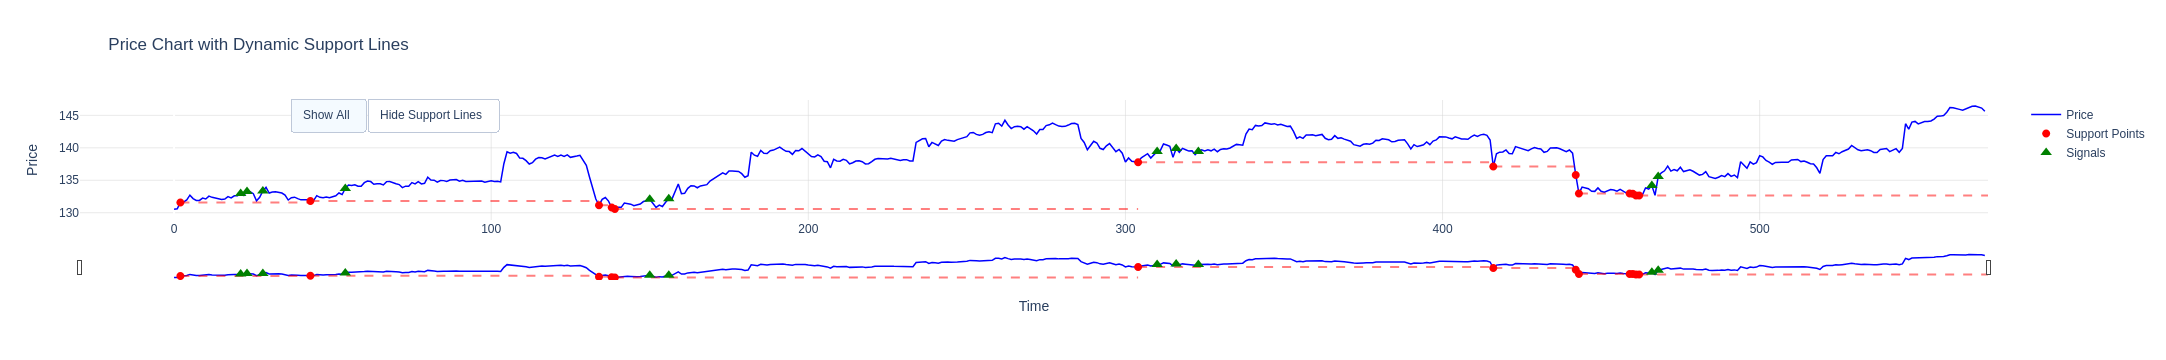

In [946]:
fig = plot_prices_with_dynamic_support(close_prices, signals, support_levels, support_indices)
fig.show()

In [673]:
end_time = datetime(2024, 11, 6, 23, 59) 
start_time = end_time - timedelta(days=30)

# Yfinance doesn't have great minute data
df = yf.download(
    "NVDA",
    start=start_time,
    end=end_time,
    interval="15m")
close_prices = np.array(df['Close'])
minutes = np.arange(len(close_prices))

[*********************100%%**********************]  1 of 1 completed


In [744]:
check3 = support_level(close_prices, 30, .005, .005, .005, 'bear')

In [745]:
signals, support_levels, support_indices = check3

In [746]:
support_levels, support_indices

([131.5800018310547,
  131.82000732421875,
  131.16009521484375,
  130.7949981689453,
  130.57989501953125,
  137.77999877929688,
  137.11000061035156,
  135.8300018310547,
  132.98080444335938,
  132.97000122070312,
  132.93080139160156,
  132.64529418945312,
  132.6427001953125],
 [2, 43, 134, 138, 139, 304, 416, 442, 443, 459, 460, 461, 462])

Support line from index 2 to 43 at level 131.5800018310547
Support line from index 43 to 134 at level 131.82000732421875
Support line from index 134 to 138 at level 131.16009521484375
Support line from index 138 to 139 at level 130.7949981689453
Support line from index 139 to 304 at level 130.57989501953125
Support line from index 304 to 416 at level 137.77999877929688
Support line from index 416 to 442 at level 137.11000061035156
Support line from index 442 to 443 at level 135.8300018310547
Support line from index 443 to 459 at level 132.98080444335938
Support line from index 459 to 460 at level 132.97000122070312
Support line from index 460 to 461 at level 132.93080139160156
Support line from index 461 to 462 at level 132.64529418945312
Support line from index 462 to 572 at level 132.6427001953125


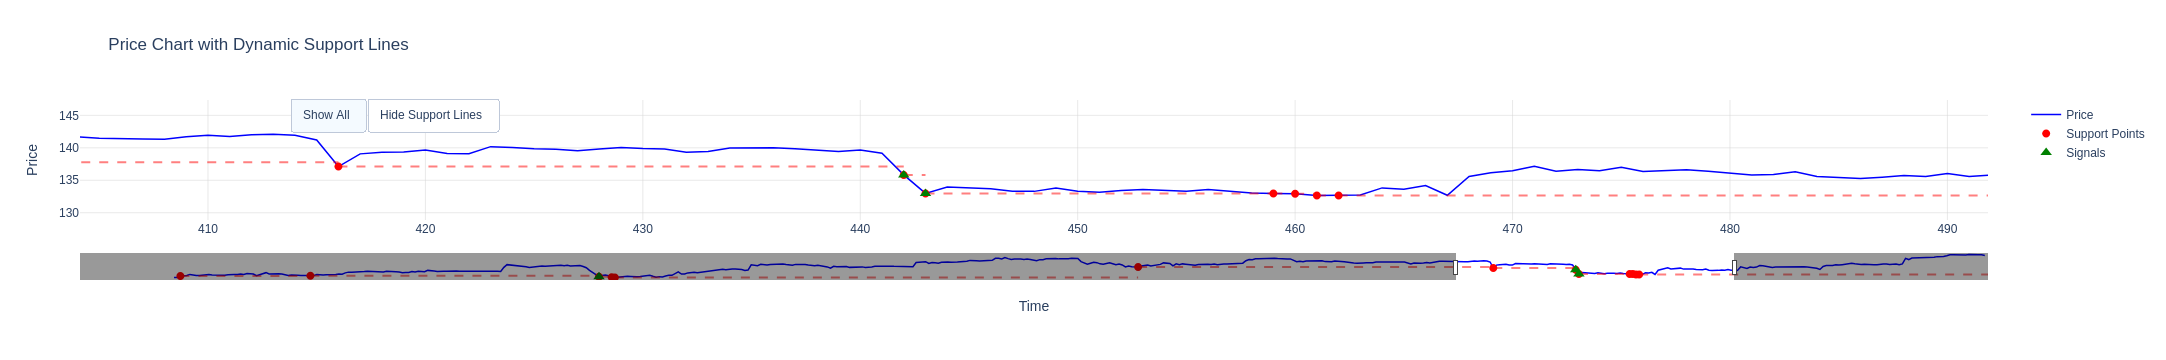

In [747]:
fig = plot_prices_with_dynamic_support(close_prices, signals, support_levels, support_indices)
fig.show()

In [964]:

def resistance_level(data: np.array, sensitivity: int, local_min_sensitivity: int, resistance_range: float,
                     bounce_level: float, break_level: float, trend: str):
    resistance_maxima = calculate_resistance(data, sensitivity)
    local_minima = calculate_support(data, local_min_sensitivity)
    signals = np.zeros(len(data))

    # Lists to store resistance levels and their indices
    resistance_levels = []
    resistance_indices = []
    current_resistance_level = None  # Track the current resistance level
    last_resistance_index = None  # Track the index of the most recent resistance level

    for i in range(2, len(data)):
        # Check if current index is a calculated resistance maxima
        if i in resistance_maxima:
            # Set the current resistance level to the new local maximum
            current_resistance_level = data[i]
            resistance_levels.append(current_resistance_level)
            resistance_indices.append(i)
            last_resistance_index = i  # Update last resistance index

        # Only perform calculations if a resistance level has been defined
        if current_resistance_level is not None:
            lower_bound = current_resistance_level * (1 - resistance_range)
            upper_bound = current_resistance_level * (1 + resistance_range)

            # Check for a local minimum between the last resistance and the current point
            bounce_condition = any(last_resistance_index < min_idx < i for min_idx in local_minima)

            if trend == 'bear' and bounce_condition:
                bounce_trigger = current_resistance_level * (1 - bounce_level)
                # Check for a bearish bounce signal
                if lower_bound < data[i - 1] < upper_bound:
                    if data[i - 1] > bounce_trigger > data[i]:
                        signals[i] = 1

            if trend == 'bull':
                breakthrough_trigger = current_resistance_level * (1 + break_level)
                # Check for a bullish breakthrough signal
                if any(data[i - 2:i] < breakthrough_trigger) and data[i] > breakthrough_trigger:
                    signals[i] = 1

        # After checking for signals, update the resistance level if the current price is higher
        if current_resistance_level is None or data[i] > current_resistance_level:
            current_resistance_level = data[i]
            resistance_levels.append(current_resistance_level)
            resistance_indices.append(i)
            last_resistance_index = i  # Update last resistance index when resistance changes

    return signals, resistance_levels, resistance_indices

In [966]:
check = resistance_level(close_prices, 30, 1, .005, .009, .005, 'bear')


In [967]:
signals, support_levels, support_indices = check

Support line from index 2 to 3 at level 131.5800018310547
Support line from index 3 to 4 at level 131.63980102539062
Support line from index 4 to 5 at level 131.98899841308594
Support line from index 5 to 21 at level 132.7100067138672
Support line from index 21 to 23 at level 132.97500610351562
Support line from index 23 to 28 at level 133.2899932861328
Support line from index 28 to 29 at level 133.35980224609375
Support line from index 29 to 55 at level 133.9095001220703
Support line from index 55 to 57 at level 134.26499938964844
Support line from index 57 to 60 at level 134.3061065673828
Support line from index 60 to 61 at level 134.6300048828125
Support line from index 61 to 80 at level 134.89300537109375
Support line from index 80 to 104 at level 135.47000122070312
Support line from index 104 to 105 at level 137.55239868164062
Support line from index 105 to 185 at level 139.3972930908203
Support line from index 185 to 189 at level 139.60060119628906
Support line from index 189 to 

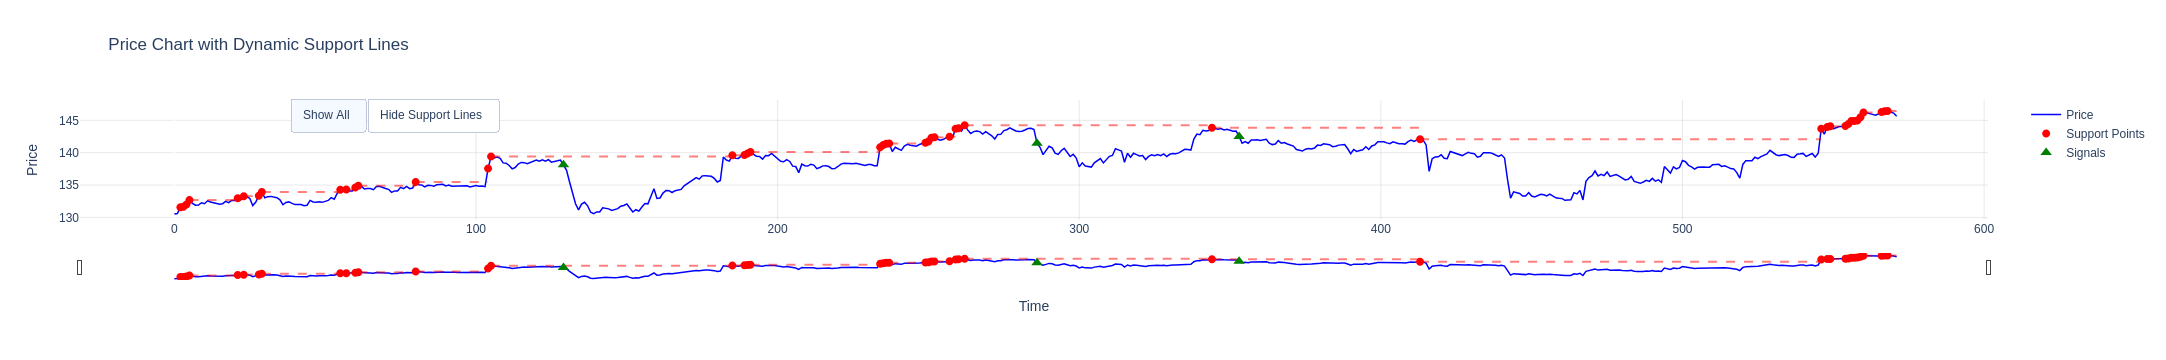

In [968]:
fig = plot_prices_with_dynamic_support(close_prices, signals, support_levels, support_indices)
fig.show()

In [971]:
check2 = resistance_level(close_prices, 30, 1, .005, .009, .005, 'bull')
signals, support_levels, support_indices = check2

Support line from index 2 to 3 at level 131.5800018310547
Support line from index 3 to 4 at level 131.63980102539062
Support line from index 4 to 5 at level 131.98899841308594
Support line from index 5 to 21 at level 132.7100067138672
Support line from index 21 to 23 at level 132.97500610351562
Support line from index 23 to 28 at level 133.2899932861328
Support line from index 28 to 29 at level 133.35980224609375
Support line from index 29 to 55 at level 133.9095001220703
Support line from index 55 to 57 at level 134.26499938964844
Support line from index 57 to 60 at level 134.3061065673828
Support line from index 60 to 61 at level 134.6300048828125
Support line from index 61 to 80 at level 134.89300537109375
Support line from index 80 to 104 at level 135.47000122070312
Support line from index 104 to 105 at level 137.55239868164062
Support line from index 105 to 185 at level 139.3972930908203
Support line from index 185 to 189 at level 139.60060119628906
Support line from index 189 to 

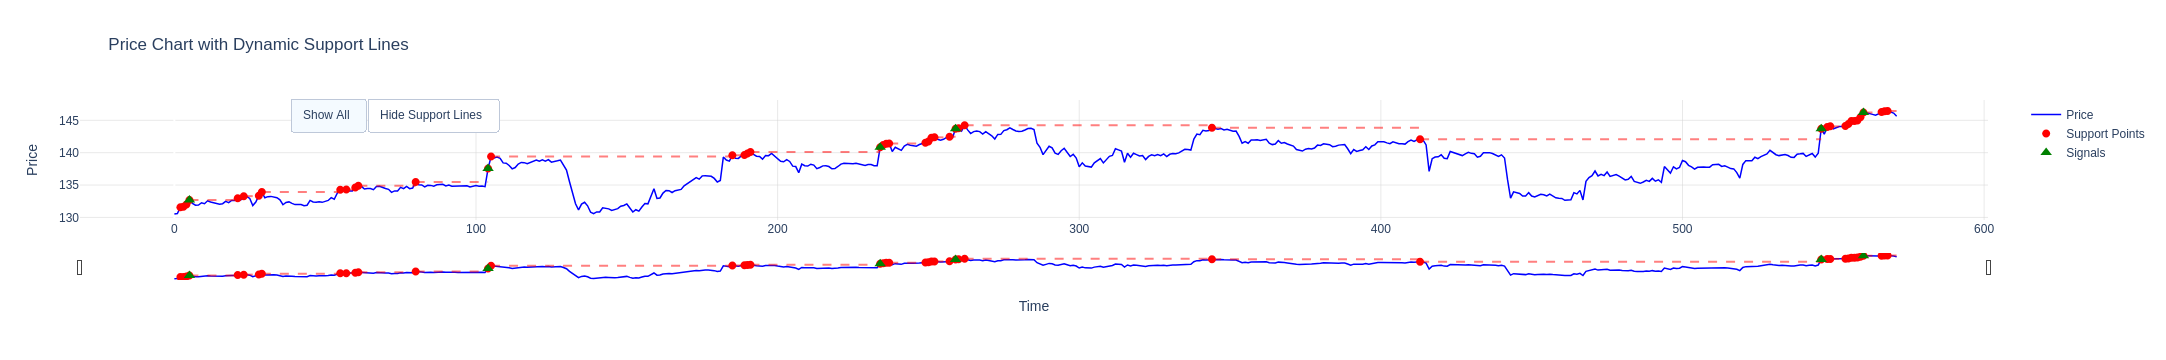

In [972]:
fig = plot_prices_with_dynamic_support(close_prices, signals, support_levels, support_indices)
fig.show()

In [1]:
from features.indicators2 import *

In [3]:
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

In [30]:
def calculate_fibonacci_levels(tick_data: List[TickData], parameters: dict) -> tuple[list[np.ndarray], list[int]]:
    data = np.array([tick.close for tick in tick_data])

    # Get support and resistance points
    resistance_maxima = calculate_resistance(data, parameters['sensitivity'])
    support_minima = calculate_support(data, parameters['sensitivity'])
    fibonacci_levels: list[np.ndarray] = []
    fibonacci_indices: list[int] = []
    fib_ratios = np.array([0, 0.236, 0.382, 0.5, 0.618, 0.786, 1], dtype=np.float64)
    current_max = None
    current_min = None
    
    for i in range(2, len(data)):
        new_levels_found = False

        # update the resistance
        if i in resistance_maxima:
            if current_max is None or data[i] > current_max:
                current_max = data[i]
                new_levels_found = True

        # Update the support
        if i in support_minima:
            if current_min is None or data[i] < current_min:
                current_min = data[i]
                new_levels_found = True

        # Calculate fib levels if we have both high and low
        if (current_max is not None and
                current_min is not None and
                new_levels_found):

            # Price range calculation
            price_range = current_max - current_min

            levels = np.array(current_max - (price_range * fib_ratios), dtype=np.float64)

            fibonacci_levels.append(levels)
            fibonacci_indices.append(i)

    return fibonacci_levels, fibonacci_indices


In [31]:
end_time = datetime(2024, 11, 6, 23, 59)
start_time = end_time - timedelta(days=30)
df = yf.download(
    "NVDA",
    start=start_time,
    end=end_time,
    interval="15m"
)

tick_data_list: List[TickData] = [
    TickData(
        close=row['Close'],
        open=row['Open'],
        high=row['High'],
        low=row['Low'],
        volume=row['Volume'],
        timestamp=index
    )
    for index, row in df.iterrows()
]

parameters = {"sensitivity": 25,
              "local_min_sensitivity": 1,
              "resistance_range": .005,
              "bounce_level": .009,
              "break_level": .005,
              "trend": "bullish"
              }

fib_data, fib_indices = calculate_fibonacci_levels(tick_data_list, parameters)

[*********************100%%**********************]  1 of 1 completed


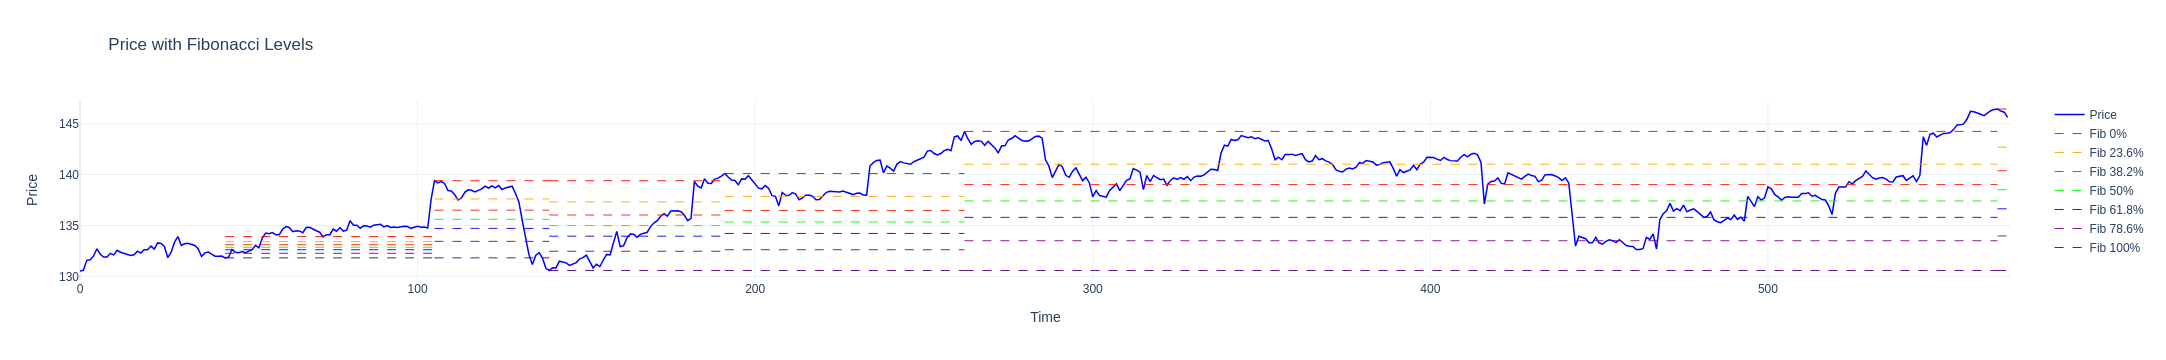

In [35]:
def plot_price_with_fibonacci(data, fib_levels, fib_indices):
    fig = go.Figure()
    
    # Plot price line
    fig.add_trace(
        go.Scatter(
            x=np.arange(len(data)),
            y=data,
            mode='lines',
            name='Price',
            line=dict(color='blue', width=1.5)
        )
    )
    
    # Fibonacci level colors and labels
    fib_colors = ['rgba(255,0,0,0.9)', 'rgba(255,165,0,0.9)', 'rgba(255,29,0,0.9)',
                  'rgba(0,255,0,0.9)', 'rgba(0,0,255,0.9)', 'rgba(128,0,128,0.9)',
                  'rgba(75,0,130,0.9)']
    fib_labels = ['0%', '23.6%', '38.2%', '50%', '61.8%', '78.6%', '100%']
    
    # Add Fibonacci levels
    for i, (levels, start_idx) in enumerate(zip(fib_levels, fib_indices)):
        # Determine end index for this set of levels
        if i < len(fib_indices) - 1:
            end_idx = fib_indices[i + 1]  # End at the start of next fib level
        else:
            end_idx = len(data)  # For the last set, extend to the end of data
            
        for level_idx, level in enumerate(levels):
            fig.add_trace(
                go.Scatter(
                    x=[start_idx, end_idx],
                    y=[level, level],
                    mode='lines',
                    line=dict(
                        color=fib_colors[level_idx],
                        width=1,
                        dash='dash'
                    ),
                    name=f'Fib {fib_labels[level_idx]}',
                    showlegend=True if i == len(fib_indices)-1 else False  # Show legend only for last set
                )
            )
    
    fig.update_layout(
        title='Price with Fibonacci Levels',
        yaxis_title='Price',
        xaxis_title='Time',
        template='plotly_white',
        hovermode='x unified'
    )
    
    return fig

fig = plot_price_with_fibonacci(close_prices, fib_data, fib_indices)
fig.show()

In [1]:
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
from features.indicators2 import *

In [3]:
end_time = datetime(2024, 11, 6, 23, 59)
start_time = end_time - timedelta(days=30)
df = yf.download(
    "NVDA",
    start=start_time,
    end=end_time,
    interval="15m"
)

close_prices = np.array(df['Close'])

tick_data_list: List[TickData] = [
    TickData(
        close=row['Close'],
        open=row['Open'],
        high=row['High'],
        low=row['Low'],
        volume=row['Volume'],
        timestamp=index
    )
    for index, row in df.iterrows()
]


[*********************100%%**********************]  1 of 1 completed


In [22]:
parameters = {"sensitivity": 40,
              "local_max_sensitivity": 1,
              "resistance_range": .004,
              "bounce_level": .001,
              "break_level": .005,
              "trend": "bullish",
              "candles_after_bounce": 3
              }

In [23]:
fib_data, fib_indices = calculate_fibonacci_levels(tick_data_list, parameters)

In [24]:
signals = fib_trigger(tick_data_list, parameters)

In [25]:
signals

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [26]:
import plotly.graph_objects as go
import numpy as np

def plot_price_with_fibonacci_signals(data, fib_levels, fib_indices, signals):
    fig = go.Figure()
    
    # Plot price line
    fig.add_trace(
        go.Scatter(
            x=np.arange(len(data)),
            y=data,
            mode='lines',
            name='Price',
            line=dict(color='blue', width=1.5)
        )
    )
    
    # Fibonacci level colors and labels
    fib_colors = ['rgba(255,0,0,0.9)', 'rgba(255,165,0,0.9)', 'rgba(255,29,0,0.9)',
                  'rgba(0,255,0,0.9)', 'rgba(0,0,255,0.9)', 'rgba(128,0,128,0.9)',
                  'rgba(75,0,130,0.9)']
    fib_labels = ['0%', '23.6%', '38.2%', '50%', '61.8%', '78.6%', '100%']
    
    # Add Fibonacci levels
    for i, (levels, start_idx) in enumerate(zip(fib_levels, fib_indices)):
        # Determine end index for this set of levels
        if i < len(fib_indices) - 1:
            end_idx = fib_indices[i + 1]
        else:
            end_idx = len(data)
            
        for level_idx, level in enumerate(levels):
            fig.add_trace(
                go.Scatter(
                    x=[start_idx, end_idx],
                    y=[level, level],
                    mode='lines',
                    line=dict(
                        color=fib_colors[level_idx],
                        width=1,
                        dash='dash'
                    ),
                    name=f'Fib {fib_labels[level_idx]}',
                    showlegend=True if i == len(fib_indices)-1 else False
                )
            )
    
    # Add signal markers
    signal_indices = np.where(signals == 1)[0]
    if len(signal_indices) > 0:
        fig.add_trace(
            go.Scatter(
                x=signal_indices,
                y=data[signal_indices],
                mode='markers',
                marker=dict(
                    symbol='triangle-up',
                    size=12,
                    color='green',
                    line=dict(width=2, color='darkgreen')
                ),
                name='Bounce Signals'
            )
        )
        
    fig.update_layout(
        title='Price with Fibonacci Levels and Bounce Signals',
        yaxis_title='Price',
        xaxis_title='Time',
        template='plotly_white',
        hovermode='x unified'
    )
    
    return fig

# Usage example:
# signals = fib_trigger(tick_data, parameters)  # Get your signals array
# fig = plot_price_with_fibonacci_signals(close_prices, fib_data, fib_indices, signals)
# fig.show()

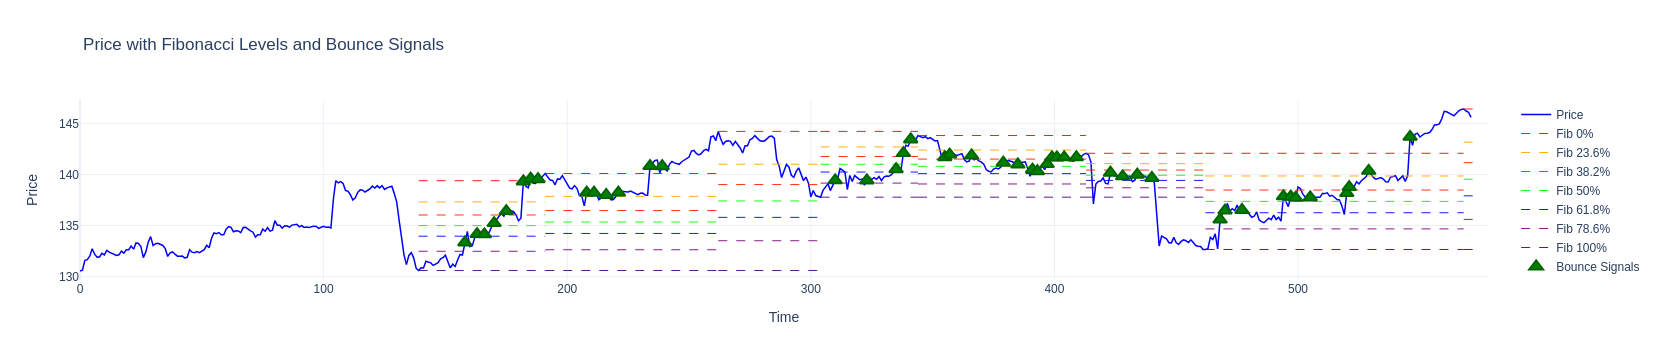

In [27]:
fig = plot_price_with_fibonacci_signals(close_prices, fib_data, fib_indices, signals)
fig.show()

In [81]:
fib_indices

[43, 105, 139, 191, 262, 568]